<a href="https://colab.research.google.com/github/patternproject/sept-datadive-cdac/blob/patternproject/policyglot/Task1b-part_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VER HISTORY
### 1: First Draft for PCA Heat Map

## Task 1b_partc

## Statement of Goal:
    Explore the ACS data, reduce the dimensionality of quantitative variables and explore if can be linked to patterns in overlaps of ookla and FCC data.

# Part 1: Reduce ACS dimensionality

In [1]:
# This is a library I'm testing, there may be better ways of visualizing this data. 
# If not, this library may be added to a requirements.txt file in the Github Repo
!pip3 install bioinfokit

     |████████████████████████████████| 84 kB 2.3 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-py3-none-any.whl size=57066 sha256=593c26b73161ba46408010ddbf2efc8618b2c56c7f43e960ee435377e32bdef2
  Stored in directory: /root/.cache/pip/wheels/38/b2/a0/3f65c463d3faababa8cb5f3076e3bfc1c49fea2a736a49038a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=814de70e035a20417bd4eb65c504c98024d0ef51bacd818ad6e93405b49b402d
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [2]:
!pip3 install geopandas

     |████████████████████████████████| 994 kB 12.1 MB/s 
     |████████████████████████████████| 6.3 MB 68.8 MB/s 
     |████████████████████████████████| 15.4 MB 18 kB/s 


In [3]:
# Imports
import pandas as pd
import numpy as np
import geopandas as gpd

##Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##Data Viz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

There needs to be a better way to read remotely from the DataKind Folder, or the GitHub Folder

For now manually reading it from local drive

In [4]:
from google.colab import files

uploaded = files.upload()

Saving acs_2019_IL.csv to acs_2019_IL.csv


In [7]:
fpath = '/content/acs_2019_IL.csv'

In [9]:
df_acs = pd.read_csv(fpath)

In [10]:
df_acs.shape

(3123, 43)

In [11]:
from google.colab import drive
#drive.mount('/content/drive')
#drive.mount('https://drive.google.com/drive/folders/15GhF-WywcBU3GCbRsE2K_7eKEtj7YifB?usp=sharing')

In [12]:
#It would make sense to see as many of the 43 columns as possible
pd.set_option("display.max_columns", 50)

In [13]:
df_acs.head()

,state,county,tract,geoid,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer,state_lkp
0,17,1,100,17001000100,0.813,0.861,0.246,0.068,0.000,10.78,48088.0,4761.0,2202.0,81.3,86.1,6.8,0.0,48088.0,24.6,2202.0,1896.0,1791.0,4761.0,324.0,4761.0,0.0,3381.0,831.0,1896,1791,1896,0,1791,105,306,4741,1044,1044,0,978,66,0,17
1,17,1,201,17001000201,0.879,0.940,0.266,0.078,0.016,10.71,44855.0,1985.0,889.0,87.9,94.0,7.8,1.6,44855.0,26.6,889.0,836.0,781.0,1985.0,155.0,1985.0,32.0,1400.0,373.0,836,781,836,5,781,50,53,1961,383,383,0,383,0,0,17
2,17,1,202,17001000202,0.863,0.933,0.221,0.080,0.008,10.83,50375.0,2376.0,970.0,86.3,93.3,8.0,0.8,50375.0,22.1,970.0,905.0,837.0,2376.0,191.0,2376.0,19.0,1527.0,338.0,905,837,905,7,829,69,65,2336,521,521,0,498,23,0,17
3,17,1,400,17001000400,0.691,0.780,0.094,0.182,0.006,10.31,30164.0,3422.0,1316.0,69.1,78.0,18.2,0.6,30164.0,9.4,1316.0,1027.0,909.0,3422.0,624.0,3422.0,20.0,2536.0,238.0,1027,909,1027,9,909,109,289,3147,645,637,0,619,18,8,17
4,17,1,500,17001000500,0.665,0.787,0.113,0.133,0.035,10.62,41008.0,2175.0,813.0,66.5,78.7,13.3,3.5,41008.0,11.3,813.0,640.0,541.0,2175.0,290.0,2175.0,77.0,1455.0,165.0,640,541,640,0,536,104,173,1878,475,458,0,434,24,17,17


In [14]:
df_acs.describe()

,state,county,tract,geoid,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer,state_lkp
count,3123.0,3123.00000,3123.000000,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3110.000000,3.123000e+03,3123.000000,3123.000000,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3.123000e+03,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000,3123.0
mean,17.0,77.84342,550658.070445,1.707839e+10,-1.707679e+04,-1.707671e+04,-1.494257e+04,-1.494271e+04,-1.494274e+04,11.021341,-2.706551e+06,4089.219020,1551.756004,-1.707679e+06,-1.707671e+06,-1.494271e+06,-1.494274e+06,-2.706551e+06,-1.494257e+06,1551.756004,1394.305796,1283.443484,4089.219020,626.099584,4089.219020,700.091899,2781.395773,963.824848,1394.305796,1283.443484,1394.305796,5.422991,1272.642331,116.240474,157.450208,3994.042267,924.236631,899.917707,1.065962,842.127121,56.724624,24.318924,17.0
std,0.0,59.65828,371654.169982,5.960782e+07,3.370392e+05,3.370392e+05,3.153218e+05,3.153218e+05,3.153218e+05,0.498528,4.293418e+07,2008.694842,766.964873,3.370392e+07,3.370392e+07,3.153218e+07,3.153218e+07,4.293418e+07,3.153218e+07,766.964873,741.175944,710.599870,2008.694842,980.364285,2008.694842,1054.395723,1375.622715,893.324306,741.175944,710.599870,741.175944,9.220730,707.715562,90.546020,108.225979,1999.898186,572.032757,568.291095,6.939161,553.018746,79.491556,49.936912,0.0
min,17.0,1.00000,100.000000,1.700100e+10,-6.666667e+06,-6.666667e+06,-6.666667e+06,-6.666667e+06,-6.666667e+06,8.260000,-6.666667e+08,0.000000,0.000000,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0
25%,17.0,31.00000,71450.000000,1.703171e+10,7.510000e-01,8.480000e-01,1.590000e-01,1.700000e-02,2.600000e-02,10.740000,4.589250e+04,2728.500000,1067.000000,7.510000e+01,8.480000e+01,1.700000e+00,2.600000e+00,4.589250e+04,1.590000e+01,1067.000000,927.000000,832.000000,2728.500000,64.000000,2728.500000,84.500000,1861.000000,342.500000,927.000000,832.000000,927.000000,0.000000,821.500000,56.000000,78.000000,2641.500000,553.000000,537.000000,0.000000,489.000000,0.000000,0.000000,17.0
50%,17.0,43.00000,804102.000000,1.704384e+10,8.230000e-01,8.980000e-01,2.620000e-01,5.200000e-02,7.500000e-02,11.030000,6.132400e+04,3825.000000,1449.000000,8.230000e+01,8.980000e+01,5.200000e+00,7.500000e+00,6.132400e+04,2.620000e+01,1449.000000,1291.000000,1187.000000,3825.000000,204.000000,3825.000000,285.000000,2621.000000,692.000000,1291.000000,1187.000000,1291.000000,0.000000,1174.000000,96.000000,141.000000,3735.000000,833.000000,806.000000,0.000000,743.000000,28.000000,0.000000,17.0
75%,17.0,115.00000,851700.500000,1.711500e+10,8.920000e-01,9.430000e-01,4.530000e-01,1.905000e-01,1.920000e-01,11.350000,8.519600e+04,5111.500000,1915.500000,8.920000e+01,9.430000e+01,1.905000e+01,1.920000e+01,8.519600e+04,4.530000e+01,1915.500000,1734.000000,1619.000000,5111.500000,753.000000,5111.500000,801.000000,3455.000000,1375.000000,1734.000000,1619.000000,1734.000000,9.000000,1606.500000,155.000000,211.000000,4965.000000,1171.500000,1144.500000,0.000000,1085.000000,78.000000,28.000

In [15]:
df_acs.columns

Index(['state', 'county', 'tract', 'geoid', 'f_broadband', 'f_computer',
       'f_ba', 'f_black', 'f_hispanic', 'log_mhi', 'mhi', 'population',
       'households', 'broadband', 'computer', 'black', 'hispanic', 'mhi.1',
       'ba', 'den_computers', 'n_computer', 'n_broadband', 'den_black',
       'n_black', 'den_hispanic', 'n_hispanic', 'den_ba', 'n_ba',
       'nhh_computer', 'nhh_broadband', 'nhh_computer_any_internet',
       'nhh_computer_and_dialup', 'nhh_computer_and_broadband',
       'nhh_computer_no_internet', 'nhh_no_computer', 'den_age', 'n_children',
       'n_children_computer', 'n_children_computer_and_dialup',
       'n_children_computer_and_broadband', 'n_children_computer_no_internet',
       'n_children_no_computer', 'state_lkp'],
      dtype='object')

Looking at the shape, columns and the summary statistics, we see a dataset that is entirely quantitative. Of course, the first few columns are IDs, and not continuous variables. They can be recast as strings. 
This would allow us to lead some work on dimensionality reduction.
Each row is a census tract. Most of the quantitative variables start with a prefix. It may be possible later to check for correlations in terms with the same prefix, especially where the prefixes 'nhh' and 'nh'.
For now, we focus on the subset of non-ID variables.

In [16]:
vars = df_acs[['f_broadband', 'f_computer',
       'f_ba', 'f_black', 'f_hispanic', 'log_mhi', 'mhi', 'population',
       'households', 'broadband', 'computer', 'black', 'hispanic', 'mhi.1',
       'ba', 'den_computers', 'n_computer', 'n_broadband', 'den_black',
       'n_black', 'den_hispanic', 'n_hispanic', 'den_ba', 'n_ba',
       'nhh_computer', 'nhh_broadband', 'nhh_computer_any_internet',
       'nhh_computer_and_dialup', 'nhh_computer_and_broadband',
       'nhh_computer_no_internet', 'nhh_no_computer', 'den_age', 'n_children',
       'n_children_computer', 'n_children_computer_and_dialup',
       'n_children_computer_and_broadband', 'n_children_computer_no_internet',
       'n_children_no_computer']]

In [17]:
# Some basic cleanup
raw = StandardScaler().fit_transform(vars.dropna())

In [18]:
raw

array([[ 0.01930425, -0.34054995, -0.37223559, ...,  0.24028611,
         0.11484295, -0.48793537],
       [ 0.63172947,  0.6891298 , -0.2791258 , ..., -0.83840209,
        -0.71561902, -0.48793537],
       [ 0.48326275,  0.59789235, -0.48862283, ..., -0.62991613,
        -0.42621561, -0.48793537],
       ...,
       [-0.16627914, -0.14504114,  0.27022199, ...,  0.86936982,
         0.42941187,  0.8941038 ],
       [ 0.04714176,  0.45451922,  0.00485907, ..., -0.02983917,
        -0.0487329 , -0.48793537],
       [-0.52816677, -0.2493125 , -0.414135  , ...,  0.00460634,
         0.84464286, -0.14743297]])

In [19]:
#We will start with a high number of components, then use an elbow plot to check for the ideal number
pca = PCA(n_components=6)
x = pca.fit_transform(raw)

In [20]:
pca

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.components_

array([[ 0.1441313 ,  0.14004853,  0.10728138, -0.09533997, -0.00713473,
         0.13696758,  0.12252745,  0.22282545,  0.22184645,  0.1441313 ,
         0.14004853, -0.09533997, -0.00713473,  0.12252745,  0.10728138,
         0.22184645,  0.22952696,  0.23267812,  0.22282545, -0.01923903,
         0.22282545,  0.0558221 ,  0.22585014,  0.20218557,  0.22952696,
         0.23267812,  0.22952696,  0.04055995,  0.23298904,  0.05241751,
        -0.00139505,  0.22487025,  0.18594887,  0.1904288 ,  0.00570456,
         0.19625575, -0.00487228, -0.0373698 ],
       [-0.24834245, -0.22297277, -0.24504409,  0.15179675,  0.10180356,
        -0.2490136 , -0.25693584,  0.12011014,  0.10492512, -0.24834245,
        -0.22297277,  0.15179675,  0.10180356, -0.25693584, -0.24504409,
         0.10492512,  0.06975732,  0.04665444,  0.12011014,  0.18058591,
         0.12011014,  0.14187807,  0.10206207, -0.08730947,  0.06975732,
         0.04665444,  0.06975732,  0.02338666,  0.04432415,  0.22116148,
   

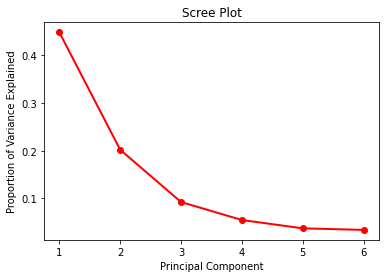

In [22]:
# Plot Values
# Drawn from: https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

The 'elbow' in the curve isn't as clear-cut as in many cases, but the diagram suggests that 2 or 3 may be sufficient. We can double check by exploring proportion of variance explained.

In [23]:
pca.explained_variance_

array([17.04719181,  7.68188417,  3.50946103,  2.07727299,  1.41363175,
        1.28737065])

In [24]:
# Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca.explained_variance_)

array([17.04719181, 24.72907598, 28.23853702, 30.31581   , 31.72944175,
       33.0168124 ])

In [25]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca.components_
num_pc = pca.n_features_

In [26]:
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

In [27]:
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))

In [28]:
#vars

In [29]:
loadings_df['variable'] = vars.columns.values

In [30]:
loadings_df = loadings_df.set_index('variable')

In [31]:
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
f_broadband,0.144131,-0.248342,-0.073346,0.095172,-0.133592,-0.120273
f_computer,0.140049,-0.222973,-0.069219,0.166104,-0.022898,-0.341535
f_ba,0.107281,-0.245044,0.116209,0.098440,0.296308,0.139911
f_black,-0.095340,0.151797,0.245136,0.435120,-0.056547,-0.017185
f_hispanic,-0.007135,0.101804,-0.461077,0.098604,0.212099,-0.031732
log_mhi,0.136968,-0.249014,-0.064152,0.029255,-0.024250,0.208371
mhi,0.122527,-0.256936,-0.024197,0.096590,0.004176,0.306606
population,0.222825,0.120110,-0.030939,0.029479,-0.065343,0.036659
households,0.221846,0.104925,0.100576,-0.092128,0.089839,-0.042481


positive and negative values in component loadings reflects the positive and negative correlation of the variables with the PCs.

Co-relation Matrix

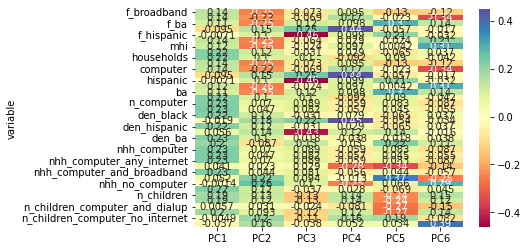

In [32]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

### Scree Plot

In [33]:
pc_list = ['PC'+str(i) for i in range(1,7)]

In [34]:
pc_list

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [35]:
# idea for this viz came from: https://www.reneshbedre.com/blog/principal-component-analysis.html
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


From the plot, it seems like 2 PCs account for most of the variance
The next task would be to see if these components are interpretable through their loadings. 

In [36]:
x.shape

(3110, 6)

In [37]:
len(vars.columns)

38

In [38]:
#So let's do the analysis again with just the 2 components
pca = PCA(n_components=2)
x = pca.fit_transform(raw)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2'], 
                        index=vars.columns)

In [39]:
loadings.T

,f_broadband,f_computer,f_ba,f_black,f_hispanic,log_mhi,mhi,population,households,broadband,computer,black,hispanic,mhi.1,ba,den_computers,n_computer,n_broadband,den_black,n_black,den_hispanic,n_hispanic,den_ba,n_ba,nhh_computer,nhh_broadband,nhh_computer_any_internet,nhh_computer_and_dialup,nhh_computer_and_broadband,nhh_computer_no_internet,nhh_no_computer,den_age,n_children,n_children_computer,n_children_computer_and_dialup,n_children_computer_and_broadband,n_children_computer_no_internet,n_children_no_computer
PC1,0.144131,0.140049,0.107281,-0.095340,-0.007135,0.136968,0.122527,0.222825,0.221846,0.144131,0.140049,-0.095340,-0.007135,0.122527,0.107281,0.221846,0.229527,0.232678,0.222825,-0.019239,0.222825,0.055822,0.225850,0.202186,0.229527,0.232678,0.229527,0.040560,0.232989,0.052418,-0.001395,0.224870,0.185949,0.190429,0.005705,0.196256,-0.004872,-0.037370
PC2,-0.248342,-0.222973,-0.245044,0.151797,0.101804,-0.249014,-0.256936,0.120110,0.104925,-0.248342,-0.222973,0.151797,0.101804,-0.256936,-0.245044,0.104925,0.069757,0.046654,0.120110,0.180586,0.120110,0.141878,0.102062,-0.087309,0.069757,0.046654,0.069757,0.023387,0.044324,0.221161,0.264355,0.119207,0.131564,0.118209,0.031358,0.092613,0.197298,0.161108


In [40]:
print(loadings['PC1'].max(), loadings['PC1'].min())

0.23298904301740644 -0.09533997299687316


In [41]:
print(loadings['PC2'].max(), loadings['PC2'].min())

0.26435463880575993 -0.2569358380696976


None of the loadings of principal components from the original variables are particularly strong. This makes interpretation challenging. Interestingly, PC2 has both a positive and negative loading of around 0.25.
Visualization may help.

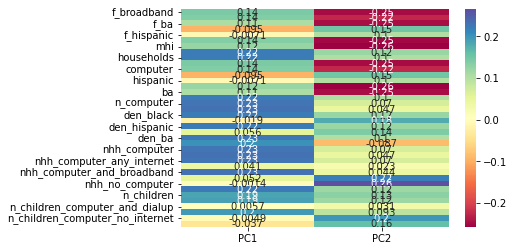

In [42]:
ax = sns.heatmap(loadings, annot=True, cmap='Spectral')
plt.show()

PC2 holds strong negative loadings with some demographic variables such as Monthly Household Income (mhi), number of families from hispanic and 'ba' backgrounds (not sure what 'ba' means). It also has a strong positive loadings correlation with the households that have no computers.

PC1 seems closely linked to variables with the 'nhh' prefix (I believe that's number of households, but we need to check the data dictionary)

# Part 2

In [43]:
illinois_map = gpd.read_file('il_spdf/il_spdf.shp')

DriverError: ignored

In [ ]:

illinois_map.plot()

In [ ]:
#Using Coordinate Reference System
illinois_map.to_crs(epsg=4326).plot()

In [ ]:
# Check for Lat Long in the other data
df_fcc = pd.read_csv('fcc_477_census_tract_IL.csv')
#flatten the tract
df_fcc.columns
#tract and download speeds

In [ ]:
df_fcc['tract']

So no, the FCC data doesn't have the required lat-long.


In [ ]:
#Ookla
df_ookla = pd.read_csv('ookla_combined_il.csv')
df_ookla.columns

In [ ]:
df_ookla.head()

In [ ]:
df_ookla['tile']

In [ ]:
df_ookla['tile_length'] = df_ookla['tile'].apply(len)

In [ ]:
df_ookla['tile_length']

In [ ]:
df_ookla['tile_length'].describe()

Phew, these tiles are quite complex. I'm best leaving this to Steven and other team members to handle on Tableau and R while I figure out the data overlaps.

# Part 3- Checking for FCC and Ookla Joins

In [ ]:
print(len(df_fcc), len(df_ookla))

There are clearly huge differences in the number of quadkeys in Ookla vs the number of census tracts in Illinois. This suggests a close concentration of a huge number of quadkeys within census tracts. And that isn't even considering quadkeys that extends across more than one census tract.

In [ ]:
#Left Join Ookla
left_join = df_ookla.merge(df_fcc, how='left', left_on='GEOID', right_on='tract')

In [ ]:
left_join

In [ ]:
# Here, ookla is the dataframe on the left.
missing_tract = left_join.loc[left_join['tract'].isnull()]
missing_tract

Okay, so every single quadkey is in at least one tract. Let's try the reverse.

In [ ]:
right_join = df_ookla.merge(df_fcc, how='right', left_on='GEOID', right_on='tract')

In [ ]:
missing_geoid = right_join.loc[right_join['GEOID'].isnull()]
missing_geoid

In [ ]:
tracts_missing_geoid = missing_geoid['tract']

All right, so there are 162 quadkeys that don't have a tract.

The next step would have been to plot against the shapefile and see which parts become blank. Steven is already taking care of that on Tableau. So I'll just compare the results of the right join with ACS and check for any patterns appearing with respect to our calculated principal components. 

# PART 3: Combine PCA and Table Join

In [ ]:
x.shape

In [ ]:
df_pc = pd.DataFrame(x, columns=['PC1', 'PC2'])

In [ ]:
df_pc

In [ ]:
df_acs.shape

In [ ]:
df_acs.dropna().shape

In [ ]:
#Now that the dimensions agree, we can combine the Principal Components into this dataframe
df_acs.dropna(inplace=True)

In [ ]:
pc_acs = pd.concat([df_acs, df_pc], axis=1)

In [ ]:
pc_acs.shape

In [ ]:
pc_acs['PC2']

In [ ]:
pc_acs.tail(13)

In [ ]:
final = pc_acs.dropna()[['geoid', 'PC1', 'PC2']]

In [ ]:
final.shape

In [ ]:
tracts_missing_geoid

In [ ]:
final_tracts = final.loc[final['geoid'].isin(tracts_missing_geoid)]
final_tracts

In [ ]:
#Hmm this raises the question of what happened to 3 of the original 162 tracts
final_tracts.describe()

In [ ]:
matched_tracts = pc_acs.loc[~pc_acs['geoid'].isin(tracts_missing_geoid)]
matched_tracts.dropna(inplace=True)

In [ ]:
matched_tracts[['PC1', 'PC2']].describe()

The values on the PC have switched signs between the matched and unmatched tracts. It might be worthwhile testing for a statistically significant difference.

Before we can run a formal statistical test, we need to ensure we meet the underlying assumptions. We will check for normality (or near-normality) of the distributions of the two components

In [ ]:
sns.histplot(data=matched_tracts, x="PC1", kde=True)

This distribution is right-skewed with a thin tail. The outliers may be worth exploring, or removing from the analysis.

In [ ]:
sns.histplot(data=matched_tracts, x="PC2", kde=True)

The plot seems more symmetric than the one above and seems to be approaching a standard normal distribution.

In [ ]:
sns.histplot(data=final_tracts, x="PC1", kde=True)

In [ ]:
sns.histplot(data=matched_tracts, x="PC2", kde=True)

The same pattern appears for PC1 (skewed) vs PC2 (more symmetric).  There may be a need to run some transformations on PC1 before the t-test's validity in this context becomes sacrosanct. 

In [ ]:
from scipy.stats import ttest_ind
print(ttest_ind(matched_tracts['PC1'], final_tracts['PC1']))

In [ ]:
print(ttest_ind(matched_tracts['PC2'], final_tracts['PC2']))

The p value is highly statistically significant for both the t Tests. So the two groups are drawn from different populations along the two variables (principal components) of interest. 
So if we are able to now plot these tracts on Illinois maps, and develop an interpretation of the two principal components, we may be able to arrive at some metrics as required by part iii of this problem. 